## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Dataset/Train'
valid_path = 'Dataset/Dataset/Test'


In [16]:
len(train_path)

21

In [12]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [17]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [18]:
  # useful for getting number of output classes
folders = glob('Dataset/Dataset/Train*')

In [19]:
folders

['Dataset/Dataset\\Train']

In [20]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [22]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
from tensorflow.keras.layers import MaxPooling2D

In [24]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [28]:
training_set

In [29]:
test_set = test_datagen.flow_from_directory('Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rajkr\AppData\Local\Temp\ipykernel_4216\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 29s 2s/step - loss: 1.7039 - accuracy: 0.5240 - val_loss: 0.6589 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 0.6699 - accuracy: 0.6394 - val_loss: 0.7700 - val_accuracy: 0.3284
Epoch 3/50
13/13 [==============================] - 19s 1s/step - loss: 0.5307 - accuracy: 0.7548 - val_loss: 0.9406 - val_accuracy: 0.3507
Epoch 4/50
13/13 [==============================] - 21s 2s/step - loss: 0.4721 - accuracy: 0.7572 - val_loss: 1.2308 - val_accuracy: 0.2313
Epoch 5/50
13/13 [==============================] - 18s 1s/step - loss: 0.4572 - accuracy: 0.7764 - val_loss: 0.9448 - val_accuracy: 0.3209
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.4257 - accuracy: 0.8053 - val_loss: 1.2795 - val_accuracy: 0.3358
Epoch 7/50
13/13 [==============================] - 17s 1s/step - loss: 0.4439 - accuracy: 0.7861 - val_loss: 1.0172 - val_accuracy: 0.3806
Epoch 8/50
13/13 [==

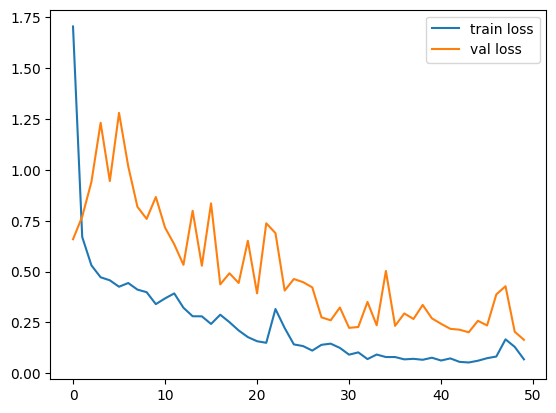

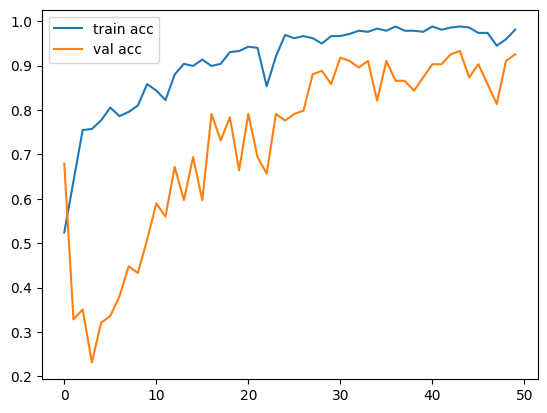

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

C:\Users\rajkr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:

y_pred = model.predict(test_set)


5/5 [==============================] - 1s 135ms/step


In [35]:
y_pred

array([[9.9999464e-01, 5.3553090e-06],
       [9.7136444e-01, 2.8635548e-02],
       [1.0000000e+00, 7.3196399e-10],
       [2.2106013e-01, 7.7893990e-01],
       [9.3590248e-01, 6.4097568e-02],
       [9.9892223e-01, 1.0777545e-03],
       [9.9995637e-01, 4.3597662e-05],
       [1.0000000e+00, 7.9952843e-11],
       [9.9580295e-02, 9.0041971e-01],
       [9.9999988e-01, 9.7243678e-08],
       [1.0000000e+00, 4.0590127e-08],
       [4.9604365e-01, 5.0395638e-01],
       [9.9998188e-01, 1.8123872e-05],
       [1.0000000e+00, 1.2948022e-15],
       [1.8090683e-01, 8.1909323e-01],
       [9.6022028e-01, 3.9779771e-02],
       [2.4330143e-02, 9.7566980e-01],
       [9.9982649e-01, 1.7358008e-04],
       [4.6004009e-02, 9.5399600e-01],
       [1.0000000e+00, 2.8647618e-10],
       [9.9999547e-01, 4.5003544e-06],
       [9.5077425e-01, 4.9225785e-02],
       [2.0162005e-02, 9.7983801e-01],
       [9.9620157e-01, 3.7984813e-03],
       [8.3226269e-01, 1.6773732e-01],
       [2.2513814e-01, 7.

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_vgg19.h5')

In [41]:
img=image.load_img('Dataset/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [42]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
model.predict(img_data)

1/1 [==============================] - 0s 101ms/step


array([[0., 1.]], dtype=float32)

In [47]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 31ms/step


In [48]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
